<a href="https://colab.research.google.com/github/kranjeet-da/ml/blob/main/Churn_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Important: Kindly go through the instructions mentioned below.

- The Sheet is structured in **4 steps**:
    1. Understanding data and manipulation
    2. Data visualization
    3. Implementing Machine Learning models(Note: It should be more than 1 algorithm)
    4. Model Evaluation and concluding with the best of the model.
    
    
    

- Try to break the codes in the **simplest form** and use number of code block with **proper comments** to them
- We are providing **h** different dataset to choose from(Note: You need to select any one of the dataset from this sample sheet only)
- The **interview calls** will be made solely based on how good you apply the **concepts**.
- Good Luck! Happy Coding!

On the basis of a given dataset, we are required to classify churn is zero or one. This is a classification problem and I am trying to apply all my techniques to this dataset.

In [ ]:
# importing important librabries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold


In [ ]:
!unzip "/content/Telecom.zip"

Archive:  /content/Telecom.zip
mapname:  conversion of  failed
 extracting: Churn.csv               


### Understanding the data

In [ ]:
# reading dataset
telcom_data = pd.read_csv("/content/Churn.csv")
#printing top 5 rows from data
telcom_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
#checking size of dataset
telcom_data.shape

(7043, 21)

In [ ]:
#checking more information of data like datatype, non_null values, etc..
telcom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
#checking statistic of dataset
telcom_data.describe

<bound method NDFrame.describe of       customerID  gender  SeniorCitizen  ... MonthlyCharges TotalCharges  Churn
0     7590-VHVEG  Female              0  ...          29.85        29.85     No
1     5575-GNVDE    Male              0  ...          56.95       1889.5     No
2     3668-QPYBK    Male              0  ...          53.85       108.15    Yes
3     7795-CFOCW    Male              0  ...          42.30      1840.75     No
4     9237-HQITU  Female              0  ...          70.70       151.65    Yes
...          ...     ...            ...  ...            ...          ...    ...
7038  6840-RESVB    Male              0  ...          84.80       1990.5     No
7039  2234-XADUH  Female              0  ...         103.20       7362.9     No
7040  4801-JZAZL  Female              0  ...          29.60       346.45     No
7041  8361-LTMKD    Male              1  ...          74.40        306.6    Yes
7042  3186-AJIEK    Male              0  ...         105.65       6844.5     No

[7043

In [ ]:
#checking null value in dataset
telcom_data.isnull().count()

customerID          7043
gender              7043
SeniorCitizen       7043
Partner             7043
Dependents          7043
tenure              7043
PhoneService        7043
MultipleLines       7043
InternetService     7043
OnlineSecurity      7043
OnlineBackup        7043
DeviceProtection    7043
TechSupport         7043
StreamingTV         7043
StreamingMovies     7043
Contract            7043
PaperlessBilling    7043
PaymentMethod       7043
MonthlyCharges      7043
TotalCharges        7043
Churn               7043
dtype: int64

In [ ]:
# Also checking Null value
telcom_data.isnull().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

### Data Manipulation

we can see in the dataset, datatype of "TotalCharge" is string but values are numerical, so I am going to convert this "TotalCharge" to float datatype

In [ ]:
telcom_data['TotalCharges'] = pd.to_numeric(telcom_data['TotalCharges'],errors = 'coerce')

In [ ]:
#Again, I am going to check null value because I am convering 'TotalCharges' to numerial value
telcom_data.isnull().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool

**We can clearly see that there is null value in "TotalCharges" so, we required to remove null value from dataset. Here I am going to choose median to fill the null value because no impact of outliers**

In [ ]:
telcom_data = telcom_data.fillna(telcom_data.median())

In [ ]:
telcom_data.isnull().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [ ]:
#Here I am ging to remove "customerID"
telcom_data = telcom_data.drop('customerID', axis=1)

In [ ]:
# In this dataset there are so many categorical features, so I am ging to check how many different types of values given.
telcom_data.groupby(telcom_data['PaymentMethod']).count()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
PaymentMethod,,,,,,,,,,,,,,,,,,,
Bank transfer (automatic),1544,1544,1544,1544,1544,1544,1544,1544,1544,1544,1544,1544,1544,1544,1544,1544,1544,1544,1544
Credit card (automatic),1522,1522,1522,1522,1522,1522,1522,1522,1522,1522,1522,1522,1522,1522,1522,1522,1522,1522,1522
Electronic check,2365,2365,2365,2365,2365,2365,2365,2365,2365,2365,2365,2365,2365,2365,2365,2365,2365,2365,2365
Mailed check,1612,1612,1612,1612,1612,1612,1612,1612,1612,1612,1612,1612,1612,1612,1612,1612,1612,1612,1612


In [ ]:
telcom_data.groupby(telcom_data['gender']).count()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,,,,,,,,,,,,,,,,,,,
Female,3488,3488,3488,3488,3488,3488,3488,3488,3488,3488,3488,3488,3488,3488,3488,3488,3488,3488,3488
Male,3555,3555,3555,3555,3555,3555,3555,3555,3555,3555,3555,3555,3555,3555,3555,3555,3555,3555,3555


In [ ]:
telcom_data.groupby(telcom_data['Partner']).count()

,gender,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
Partner,,,,,,,,,,,,,,,,,,,
No,3641,3641,3641,3641,3641,3641,3641,3641,3641,3641,3641,3641,3641,3641,3641,3641,3641,3641,3641
Yes,3402,3402,3402,3402,3402,3402,3402,3402,3402,3402,3402,3402,3402,3402,3402,3402,3402,3402,3402


In [ ]:
telcom_data.groupby(telcom_data['Dependents']).count()

,gender,SeniorCitizen,Partner,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
Dependents,,,,,,,,,,,,,,,,,,,
No,4933,4933,4933,4933,4933,4933,4933,4933,4933,4933,4933,4933,4933,4933,4933,4933,4933,4933,4933
Yes,2110,2110,2110,2110,2110,2110,2110,2110,2110,2110,2110,2110,2110,2110,2110,2110,2110,2110,2110


In [ ]:
telcom_data.groupby(telcom_data['PhoneService']).count()

,gender,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
PhoneService,,,,,,,,,,,,,,,,,,,
No,682,682,682,682,682,682,682,682,682,682,682,682,682,682,682,682,682,682,682
Yes,6361,6361,6361,6361,6361,6361,6361,6361,6361,6361,6361,6361,6361,6361,6361,6361,6361,6361,6361


In [ ]:
telcom_data.groupby(telcom_data['MultipleLines']).count()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
MultipleLines,,,,,,,,,,,,,,,,,,,
No,3390,3390,3390,3390,3390,3390,3390,3390,3390,3390,3390,3390,3390,3390,3390,3390,3390,3390,3390
No phone service,682,682,682,682,682,682,682,682,682,682,682,682,682,682,682,682,682,682,682
Yes,2971,2971,2971,2971,2971,2971,2971,2971,2971,2971,2971,2971,2971,2971,2971,2971,2971,2971,2971


In [ ]:
telcom_data.groupby(telcom_data['InternetService']).count()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
InternetService,,,,,,,,,,,,,,,,,,,
DSL,2421,2421,2421,2421,2421,2421,2421,2421,2421,2421,2421,2421,2421,2421,2421,2421,2421,2421,2421
Fiber optic,3096,3096,3096,3096,3096,3096,3096,3096,3096,3096,3096,3096,3096,3096,3096,3096,3096,3096,3096
No,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526


In [ ]:
telcom_data.groupby(telcom_data['OnlineSecurity']).count()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
OnlineSecurity,,,,,,,,,,,,,,,,,,,
No,3498,3498,3498,3498,3498,3498,3498,3498,3498,3498,3498,3498,3498,3498,3498,3498,3498,3498,3498
No internet service,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526
Yes,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019


In [ ]:
telcom_data.groupby(telcom_data['StreamingMovies']).count()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
StreamingMovies,,,,,,,,,,,,,,,,,,,
No,2785,2785,2785,2785,2785,2785,2785,2785,2785,2785,2785,2785,2785,2785,2785,2785,2785,2785,2785
No internet service,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526
Yes,2732,2732,2732,2732,2732,2732,2732,2732,2732,2732,2732,2732,2732,2732,2732,2732,2732,2732,2732


In [ ]:
telcom_data.groupby(telcom_data['PaperlessBilling']).count()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
PaperlessBilling,,,,,,,,,,,,,,,,,,,
No,2872,2872,2872,2872,2872,2872,2872,2872,2872,2872,2872,2872,2872,2872,2872,2872,2872,2872,2872
Yes,4171,4171,4171,4171,4171,4171,4171,4171,4171,4171,4171,4171,4171,4171,4171,4171,4171,4171,4171


We can see that above all categorical variable, max different type of variable is four

In [ ]:
# Now I am going to use Label encoder to convert it into numerical
# first I am going to take all catecorical features in a variable
columns_categorical = list(telcom_data.select_dtypes(include=['category','object']))

In [ ]:
columns_categorical

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [ ]:
# Label encoder
lbe = LabelEncoder()

In [ ]:
def label_ecoder(df, variable):
    df[variable+"_"+'label_enc'] = lbe.fit_transform(df[variable])


In [ ]:
for feature in columns_categorical:
    label_ecoder(telcom_data, feature)

In [ ]:
telcom_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender_label_enc,Partner_label_enc,Dependents_label_enc,PhoneService_label_enc,MultipleLines_label_enc,InternetService_label_enc,OnlineSecurity_label_enc,OnlineBackup_label_enc,DeviceProtection_label_enc,TechSupport_label_enc,StreamingTV_label_enc,StreamingMovies_label_enc,Contract_label_enc,PaperlessBilling_label_enc,PaymentMethod_label_enc,Churn_label_enc
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1


In [ ]:
# Now I am going to drop categorical features
telcom_data = telcom_data.drop(columns_categorical, axis =1)

In [ ]:
telcom_data.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_label_enc,Partner_label_enc,Dependents_label_enc,PhoneService_label_enc,MultipleLines_label_enc,InternetService_label_enc,OnlineSecurity_label_enc,OnlineBackup_label_enc,DeviceProtection_label_enc,TechSupport_label_enc,StreamingTV_label_enc,StreamingMovies_label_enc,Contract_label_enc,PaperlessBilling_label_enc,PaymentMethod_label_enc,Churn_label_enc
0,0,1,29.85,29.85,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,0,2,53.85,108.15,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1


### Data Visualization

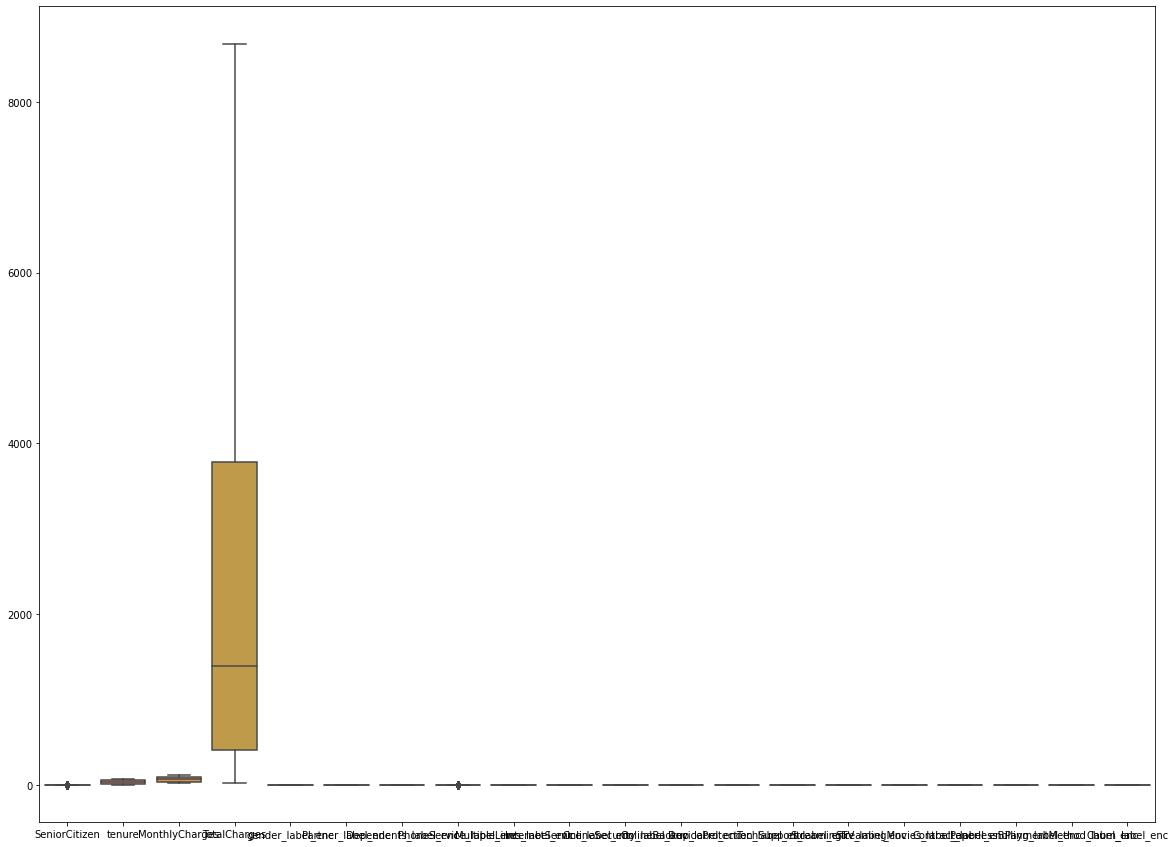

In [ ]:
# visualizing whole data
plt.figure(figsize=(20, 15))
sns.boxplot(data=telcom_data)

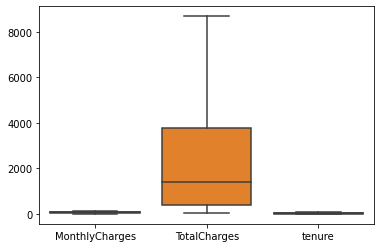

In [ ]:
#choosing only numerical features which are in given dataset, I am not using categorical features here.
df = telcom_data[['MonthlyCharges', 'TotalCharges', 'tenure']]

sns.boxplot(data=df)

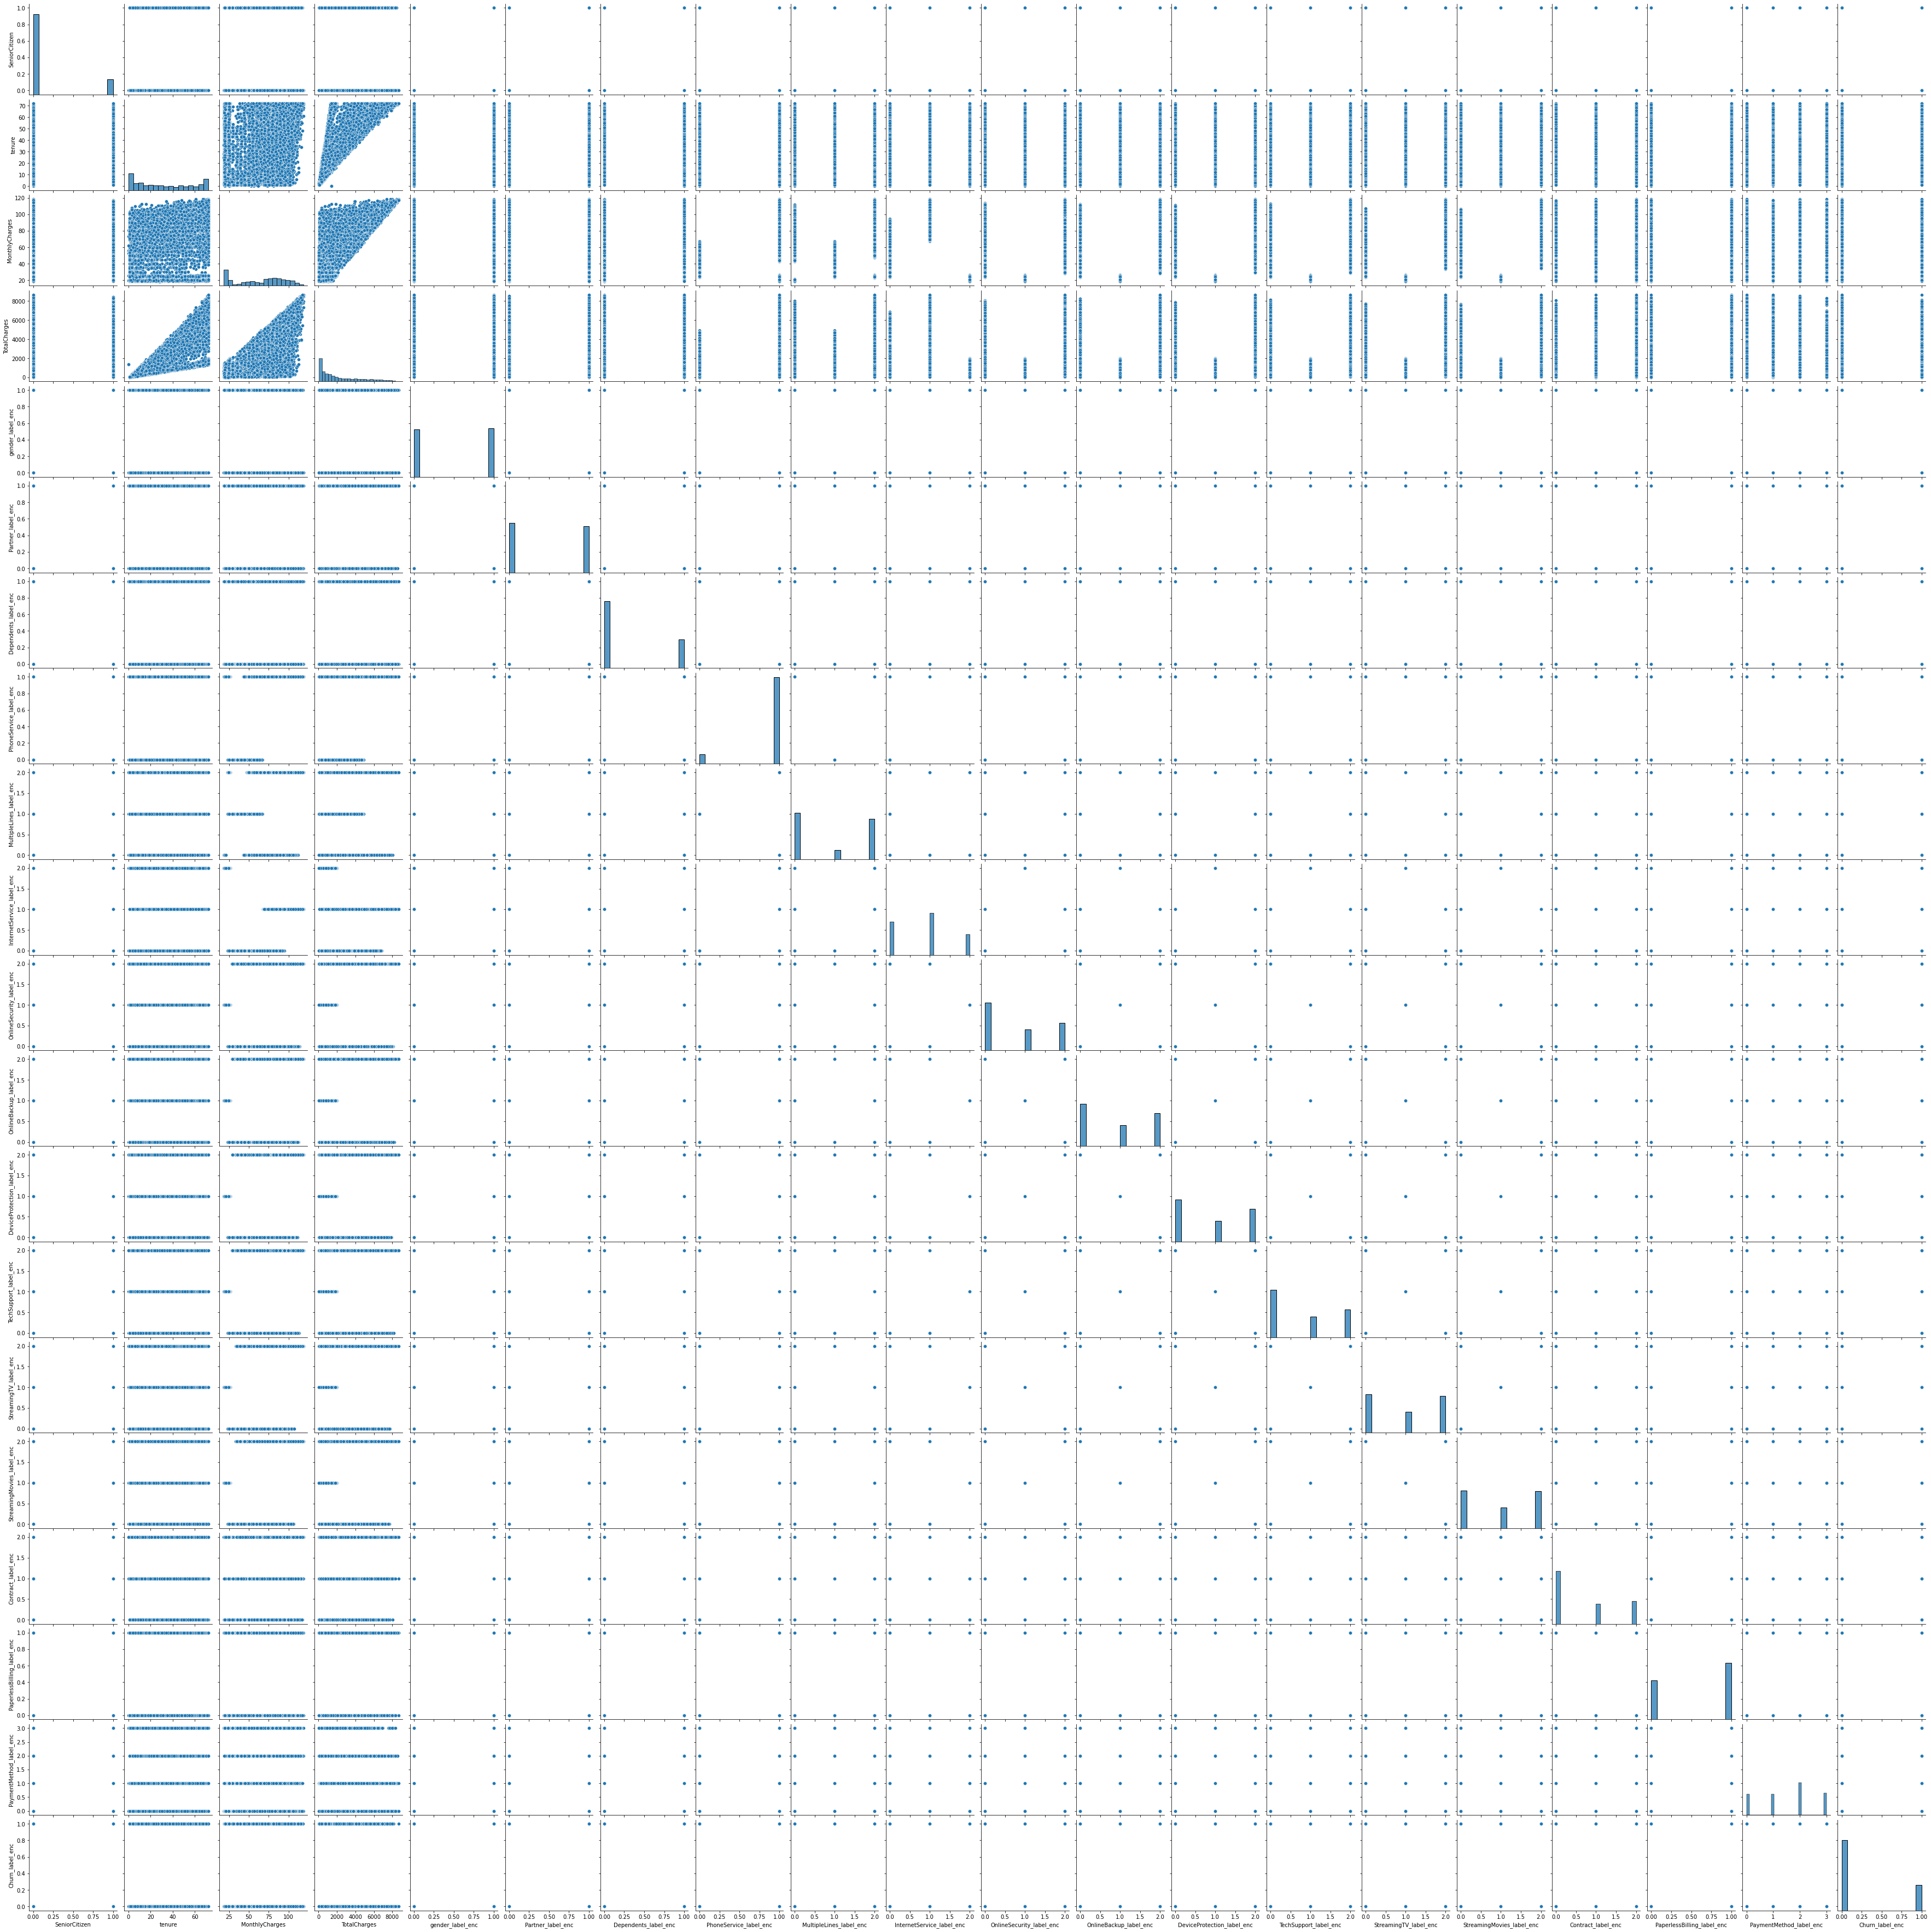

In [ ]:
#checking distributeion of dataset
sns.pairplot(telcom_data)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


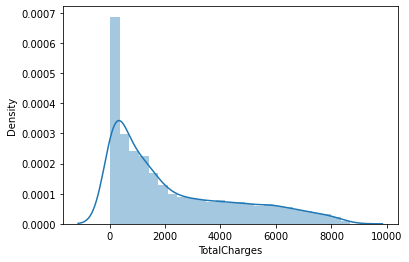

In [ ]:
sns.distplot(telcom_data["TotalCharges"])

We can see that "TotalCharges" is right skewed. So, we required convert it into normal distribution

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


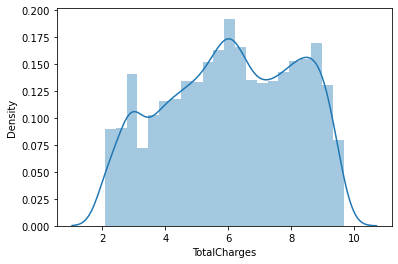

In [ ]:
#Here using Square Root Transformation for distribution
telcom_data['TotalCharges'] = telcom_data['TotalCharges']**(.5) 
sns.distplot(telcom_data["TotalCharges"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


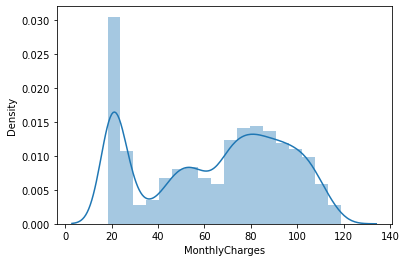

In [ ]:
sns.distplot(telcom_data["MonthlyCharges"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


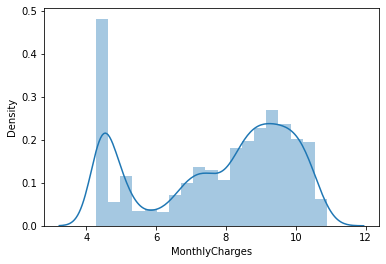

In [ ]:
telcom_data['MonthlyCharges'] = telcom_data['MonthlyCharges']**(.5) 
sns.distplot(telcom_data["MonthlyCharges"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


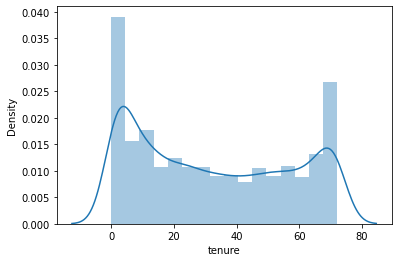

In [ ]:
sns.distplot(telcom_data["tenure"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


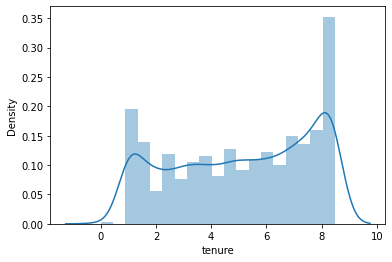

In [ ]:
telcom_data['tenure'] = telcom_data['tenure']**(.5) 
sns.distplot(telcom_data["tenure"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


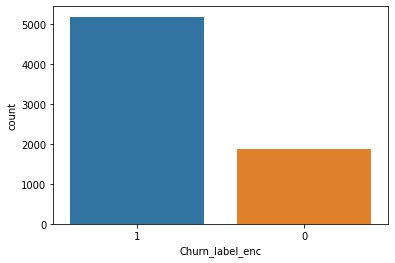

In [ ]:
# visualize the target variable
g = sns.countplot(telcom_data['Churn_label_enc'])
g.set_xticklabels(['1','0'])
plt.show()

We can see our target data is imbalance.

In [ ]:
### Conclusion: What all did you understand from the above charts

### Implement Machine Learning Models and Model Evaluation

---



In [ ]:
# Here droping target data from telcom_data and storing in variable y
x = telcom_data.drop('Churn_label_enc', axis=1)
y = telcom_data['Churn_label_enc']

In [ ]:
# Here I am going to standrize our x data
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaled_x = scaler.fit_transform(x)
x = pd.DataFrame(scaled_x)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 42)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((4930, 19), (2113, 19), (4930,), (2113,))

In [ ]:
clfs = {
    'svm1': SVC(kernel='linear'),
    'svm2': SVC(kernel='rbf'),
    'svm3': SVC(kernel='sigmoid'),
    'ada': AdaBoostClassifier(),
    'dtc': DecisionTreeClassifier(),
    'rfc': RandomForestClassifier(),
    'gbc': GradientBoostingClassifier(),
    'lr': LogisticRegression()
}

In [ ]:
f1_scores_w = dict()
for clf_name in clfs:
    print(clf_name)
    clf = clfs[clf_name]
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    f1_scores_w[clf_name] = f1_score(y_pred, y_test)

svm1
svm2
svm3
ada
dtc
rfc
gbc
lr


In [ ]:
f1_scores_w

{'ada': 0.5875486381322957,
 'dtc': 0.4885361552028219,
 'gbc': 0.5848871442590775,
 'lr': 0.6071774975751697,
 'rfc': 0.5644670050761421,
 'svm1': 0.526775956284153,
 'svm2': 0.5693877551020408,
 'svm3': 0.5004374453193351}

Without balanceing the data, logistic regression giving 60.72%

In [ ]:
# Going to blance the data
smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(x, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_smote))

Original dataset shape Counter({0: 5174, 1: 1869})
Resample dataset shape Counter({0: 5174, 1: 5174})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.3, random_state = 42)

In [ ]:
clfs = {
    'svm1': SVC(kernel='linear'),
    'svm2': SVC(kernel='rbf'),
    'svm3': SVC(kernel='sigmoid'),
    'ada': AdaBoostClassifier(),
    'dtc': DecisionTreeClassifier(),
    'rfc': RandomForestClassifier(),
    'gbc': GradientBoostingClassifier(),
    'lr': LogisticRegression()
}

In [ ]:
f1_scores2 = dict()
for clf_name in clfs:
    print(clf_name)
    clf = clfs[clf_name]
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    f1_scores2[clf_name] = f1_score(y_pred, y_test)

svm1
svm2
svm3
ada
dtc
rfc
gbc
lr


In [ ]:
f1_scores2

{'ada': 0.8325479107759974,
 'dtc': 0.7849918433931484,
 'gbc': 0.8543381887270425,
 'lr': 0.7897240723120837,
 'rfc': 0.8515625,
 'svm1': 0.7939981244138794,
 'svm2': 0.8215613382899628,
 'svm3': 0.6858064516129032}

We can see that after balancing the data "**GradientBoostingClassifier**" giving 85.43% accuracy and "**RandomForestClassifier**" also giving good accuracy(85.15%)

# Hyperparameter tuning of GradientBoostingClassifier

In [ ]:
gb_clf = GradientBoostingClassifier(random_state=42)
skfold = StratifiedKFold(n_splits=5)
param_grid = {
              'n_estimators' : [25, 50 ,75, 100, 200],
              'learning_rate': [0.005 ,0.05, 0.5, 1.5],
              'max_depth': [2, 4, 6, 8],
              'max_features': [10, 12, 17] 
              }
grid_gb_clf = GridSearchCV(gb_clf, param_grid, cv=skfold, scoring="accuracy", n_jobs= -1, verbose = 1)
grid_gb_clf.fit(x_train, y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   16.3s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 11.9min
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed: 18.7min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2...
                                                  presort='deprecated',
                                                  random_state=42,
                

In [ ]:
y_pred = grid_gb_clf.predict(x_test)

In [ ]:
f1_scores1 = f1_score(y_pred, y_test)

In [ ]:
f1_scores1

0.8562091503267973

In [ ]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [10,15],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5,6],
    'min_samples_split': [3,4,5,6],
    'n_estimators' : [25, 50 ,75, 100, 200]
}
# Create a based model
rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(x_train,y_train)

Fitting 3 folds for each of 320 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   47.0s
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed:  5.3min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 15,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 4,
 'n_estimators': 200}

In [ ]:
best_grid = grid_search.best_estimator_

In [ ]:
y_pred = best_grid.predict(x_test)
f1_scores2 = f1_score(y_pred, y_test)

In [ ]:
f1_scores2

0.8434118395926161

### Final Conclusions

Gradient Boosting Classifier in both cases after balancing data and hyperparameter tuning is giving best result. Random Forest classifier is closest to Gradient Boosting Classifier.

Acuuracy:-

1.   Gradient Boosting Classifier - 85.62%
2.   Random Forest classifier - 85.15%


